# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# Your code here
df=pd.read_csv('data_all.csv', nrows=75000)

In [3]:
df.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data=df.values 
print ('Dimensiones matriz de datos: {}'.format(data.shape))

Dimensiones matriz de datos: (75000, 785)


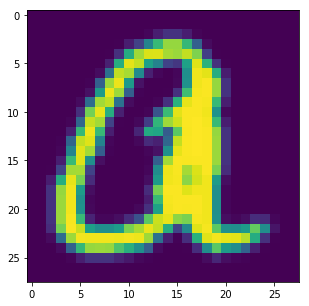

In [5]:
plt.figure(figsize=(5,5))
plt.imshow(data[0,1:].reshape(28,28))  
plt.show()

In [6]:
alfabeto={0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9',
          10:'A', 11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J',
          20:'K', 21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T',
          30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z',
          36:'a', 37:'b', 38:'c', 39:'d', 40:'e', 41:'f', 42:'g', 43:'h', 44:'i', 45:'j',
          46:'k', 47:'l', 48:'m', 49:'n', 50:'o', 51:'p', 52:'q', 53:'r', 54:'s', 55:'t',
          56:'u', 57:'v', 58:'w', 59:'x', 60:'y', 61:'z'}

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [7]:
# Your code here
upper=df.loc[(df.e>=10) & (df.e<36)]
upper.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
upper_data=upper.values
upper_data.shape

(20136, 785)

In [9]:
X=upper_data[:,1:]/255

In [10]:
y=upper_data[:,0] 

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape 

(16108, 784)

In [12]:
rf=RandomForestClassifier(n_estimators=1000, max_depth=5).fit(X_train, y_train)

In [13]:
def resumen(datos, modelo):
    for e in datos:
        nombre, etiqueta, Xs=e
        etiq=etiqueta.size
        
        y_pred=modelo.predict(Xs)
        
        cuenta=0
        for muestra in range(etiq):
            if y_pred[muestra]==etiqueta[muestra]:         
                cuenta+=1
        
        print ("\n{}".format(nombre))
        print ("{} correctos de {} ==> {:.4}% correcto".format(cuenta, etiq, cuenta/etiq*100))

In [14]:
resumen([('Entranamiento  :', y_train, X_train)], rf)
resumen([('Test  :', y_test, X_test)], rf)


Entranamiento  :
10466 correctos de 16108 ==> 64.97% correcto

Test  :
2555 correctos de 4028 ==> 63.43% correcto


In [15]:
classification_report(y_test, rf.predict(X_test))

/home/iudh/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n        10.0       0.79      0.63      0.70       175\n        11.0       0.00      0.00      0.00        90\n        12.0       0.61      0.84      0.71       242\n        13.0       1.00      0.06      0.12        97\n        14.0       0.83      0.25      0.38       102\n        15.0       0.62      0.49      0.55       172\n        16.0       0.00      0.00      0.00        61\n        17.0       0.00      0.00      0.00        63\n        18.0       0.51      0.90      0.65       280\n        19.0       0.00      0.00      0.00        80\n        20.0       0.00      0.00      0.00        55\n        21.0       0.94      0.27      0.42       107\n        22.0       0.75      0.93      0.83       188\n        23.0       0.57      0.73      0.64       169\n        24.0       0.65      0.96      0.78       532\n        25.0       0.59      0.86      0.70       147\n        26.0       0.00      0.00      0.00        56\n       

* Try to do the same thing with lowercases.

In [16]:
# Your code here
lower=df.loc[df.e>35]
lower.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
lower_data=lower.values
lower_data.shape

(17400, 785)

In [18]:
X=lower_data[:,1:]/255

In [19]:
y=lower_data[:,0] 

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape 

(13920, 784)

In [21]:
svc=SVC(gamma='auto').fit(X_train, y_train)

In [22]:
resumen([('Entranamiento  :', y_train, X_train)], svc)
resumen([('Test  :', y_test, X_test)], svc)


Entranamiento  :
11466 correctos de 13920 ==> 82.37% correcto

Test  :
2796 correctos de 3480 ==> 80.34% correcto


In [23]:
classification_report(y_test, svc.predict(X_test))

/home/iudh/.local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n        36.0       0.67      0.85      0.75       170\n        37.0       0.86      0.77      0.81       115\n        38.0       1.00      0.43      0.60        56\n        39.0       0.84      0.91      0.87       228\n        40.0       0.86      0.95      0.90       496\n        41.0       0.83      0.49      0.62        51\n        42.0       0.51      0.57      0.53        69\n        43.0       0.78      0.84      0.81       195\n        44.0       0.00      0.00      0.00        55\n        45.0       0.81      0.71      0.76        42\n        46.0       0.80      0.38      0.52        63\n        47.0       0.76      0.94      0.84       326\n        48.0       0.93      0.78      0.85        50\n        49.0       0.82      0.91      0.86       262\n        50.0       0.94      0.75      0.83        60\n        51.0       0.85      0.67      0.75        52\n        52.0       0.74      0.38      0.50        61\n       

* Try to do the same thing with numbers.

In [24]:
# Your code here
number=df.loc[df.e<10]
number.head()

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
number_data=number.values
number_data.shape

(37464, 785)

In [26]:
X=number_data[:,1:]/255

In [27]:
y=number_data[:,0] 

In [28]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)
X_train.shape                                                 

(29971, 784)

In [29]:
logreg=LogisticRegression(C=0.01, penalty='l2', tol=0.0001, max_iter=70,
                          solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

/home/iudh/.local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [30]:
resumen([('Entranamiento  :', y_train, X_train)], logreg)
resumen([('Test  :', y_test, X_test)], logreg)


Entranamiento  :
28055 correctos de 29971 ==> 93.61% correcto

Test  :
6942 correctos de 7493 ==> 92.65% correcto


In [31]:
classification_report(y_test, logreg.predict(X_test))

'              precision    recall  f1-score   support\n\n         0.0       0.95      0.95      0.95       775\n         1.0       0.95      0.97      0.96       841\n         2.0       0.94      0.93      0.93       710\n         3.0       0.93      0.93      0.93       763\n         4.0       0.90      0.92      0.91       714\n         5.0       0.88      0.88      0.88       674\n         6.0       0.96      0.95      0.96       732\n         7.0       0.95      0.95      0.95       807\n         8.0       0.90      0.88      0.89       721\n         9.0       0.89      0.90      0.90       756\n\n   micro avg       0.93      0.93      0.93      7493\n   macro avg       0.93      0.93      0.93      7493\nweighted avg       0.93      0.93      0.93      7493\n'